In [1]:
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import pairwise_distances
%matplotlib inline

In [2]:
df = pd.read_csv('modelingdf.csv')
df = df.drop('Unnamed: 0', axis =1)

In [3]:
df.head()

,A,FC,G,GP,GS,MINS,OFF,R,SHTS,SOG,Y,season,club,position,next_year_compensation,name,current_compensation
0,0.0,7.0,0.0,8.0,5.0,460.0,3.0,0.0,8.0,3.0,0.0,2007,CLB,M,12900,brian plotkin,30000
1,4.0,28.0,3.0,30.0,11.0,1241.0,4.0,0.0,38.0,16.0,5.0,2007,CHI,F,63100,calen carr,50500
2,2.0,21.0,8.0,33.0,28.0,2181.0,37.0,0.0,65.0,41.0,3.0,2007,TFC,F,61273,chad barrett,48713
3,3.0,15.0,8.0,22.0,21.0,1721.0,5.0,0.0,44.0,22.0,1.0,2007,CHI,F,86075,chris rolfe,74700
4,0.0,43.0,1.0,26.0,24.0,2044.0,2.0,0.0,11.0,3.0,4.0,2007,CHI,D,44625,dasan robinson,42500


In [4]:
cluster_columns = ['A', 'SOG', 'G', 'MINS']
df_no_GP = df[df['GP'] != 0]
dfstats = df_no_GP[cluster_columns]
for col in cluster_columns:
    dfstats[col] = dfstats[col] / df_no_GP['GP']
dfstats.head()

/Users/joshuarkarnad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,A,SOG,G,MINS
0,0.000000,0.375000,0.000000,57.500000
1,0.133333,0.533333,0.100000,41.366667
2,0.060606,1.242424,0.242424,66.090909
3,0.136364,1.000000,0.363636,78.227273
4,0.000000,0.115385,0.038462,78.615385


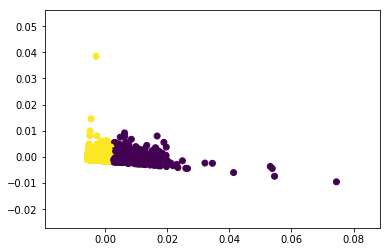

In [5]:
X_norm = normalize(dfstats)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)
model1 = KMeans(n_clusters=2).fit(X_norm)
cluster_assignment_kmeans = model1.predict(X_norm)
plt.scatter(X_pca[:,0], X_pca[:,1], c = cluster_assignment_kmeans)

In [6]:
kmeanscluster1 = df_no_GP[cluster_assignment_kmeans == 0]
kmeanscluster2 = df_no_GP[cluster_assignment_kmeans == 1]

In [7]:
kmeanscluster1.describe()

,A,FC,G,GP,GS,MINS,OFF,R,SHTS,SOG,Y,season,next_year_compensation,current_compensation
count,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,6.210000e+02,6.210000e+02
mean,3.603865,23.041868,6.028986,23.008052,17.417069,1563.470209,10.428341,0.162641,44.315620,18.983897,2.476651,2012.370370,4.761945e+05,4.312671e+05
std,4.106751,15.233077,5.197003,9.579461,10.750617,909.422114,9.942420,0.429879,30.621733,12.866801,2.185329,3.127612,1.009026e+06,9.957312e+05
min,0.000000,0.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2007.000000,2.010000e+04,1.290000e+04
25%,1.000000,11.000000,2.000000,16.000000,9.000000,821.000000,3.000000,0.000000,20.000000,9.000000,1.000000,2010.000000,9.900000e+04,8.200000e+04
50%,3.000000,21.000000,5.000000,25.000000,17.000000,1574.000000,7.000000,0.000000,40.000000,17.000000,2.000000,2013.000000,1.750000e+05,1.522000e+05
75%,5.000000,32.000000,8.000000,31.000000,27.000000,2317.000000,15.000000,0.000000,61.000000,26.000000,4.000000,2015.000000,3.341670e+05,2.750000e+05
max,50.000000,82.000000,31.000000,62.000000,62.000000,5284.000000,82.000000,3.000000,214.000000,71.000000,10.000000,2017.000000,7.115556e+06,7.115556e+06


In [8]:
kmeanscluster2.describe()

,A,FC,G,GP,GS,MINS,OFF,R,SHTS,SOG,Y,season,next_year_compensation,current_compensation
count,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.00000,1651.000000,1651.000000,1651.000000,1.651000e+03,1.651000e+03
mean,1.796487,20.631738,1.002423,20.959419,17.810418,1592.923077,1.465778,0.211993,13.27983,4.035736,2.888552,2012.517868,1.932835e+05,1.823899e+05
std,2.418066,14.655190,1.454354,10.102453,10.690116,935.808326,2.620527,0.470849,13.04293,4.472874,2.460044,3.052493,4.076161e+05,4.271795e+05
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2007.000000,1.290000e+04,1.290000e+04
25%,0.000000,10.000000,0.000000,13.000000,9.000000,821.000000,0.000000,0.000000,3.00000,1.000000,1.000000,2010.000000,7.560000e+04,6.670850e+04
50%,1.000000,18.000000,0.000000,22.000000,18.000000,1617.000000,1.000000,0.000000,9.00000,3.000000,2.000000,2013.000000,1.282560e+05,1.171430e+05
75%,3.000000,29.000000,2.000000,29.000000,27.000000,2361.500000,2.000000,0.000000,19.00000,6.000000,4.000000,2015.000000,1.952500e+05,1.841875e+05
max,19.000000,96.000000,10.000000,68.000000,66.000000,5774.000000,24.000000,3.000000,100.00000,38.000000,15.000000,2017.000000,6.500000e+06,6.500000e+06


In [9]:
kmeanscluster1.club.value_counts(1)

HOU      0.077295
LA       0.067633
CLB      0.066023
SJ       0.062802
DAL      0.059581
DC       0.057971
RSL      0.057971
NE       0.051530
SEA      0.048309
KC       0.046699
COL      0.046699
CHI      0.045089
POR      0.040258
PHI      0.037037
CHV      0.037037
VAN      0.035427
NY       0.030596
MTL      0.030596
TOR      0.027375
NYRB     0.017713
TFC      0.016103
ORL      0.014493
NYCFC    0.009662
MNUFC    0.006441
MLS      0.004831
LAFC     0.003221
ATL      0.001610
Name: club, dtype: float64

In [10]:
kmeanscluster2.club.value_counts(1)

COL      0.062386
DC       0.062386
KC       0.062386
SJ       0.058752
RSL      0.055118
DAL      0.054512
HOU      0.052695
CLB      0.052090
CHI      0.051484
SEA      0.050878
LA       0.050878
NE       0.049667
POR      0.040581
TOR      0.039976
CHV      0.036947
PHI      0.036342
VAN      0.035736
MTL      0.031496
NY       0.031496
NYRB     0.018776
ORL      0.017565
TFC      0.012720
NYCFC    0.012114
MNUFC    0.010902
ATL      0.007874
LAFC     0.003634
MLS      0.000606
Name: club, dtype: float64

In [16]:
kmeanscluster1.position.value_counts()

F      374
M      168
M-F     37
F-M     18
D       10
M-D      5
D/F      3
F/M      3
M/F      2
D-M      1
Name: position, dtype: int64

In [17]:
kmeanscluster2.position.value_counts()

D      727
M      645
F      138
D-M     60
M-D     29
M-F     27
F-M     15
M/F      5
M/D      2
D/M      2
F/M      1
Name: position, dtype: int64

In [18]:
df_no_GP.position.value_counts()

M      813
D      737
F      512
M-F     64
D-M     61
M-D     34
F-M     33
M/F      7
F/M      4
D/F      3
M/D      2
D/M      2
Name: position, dtype: int64